### Importing libraries 

In [ ]:
%pip install xgboost

In [24]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Loading the dataset

In [3]:
# importing the datset from my library and showing the first 10 entries 
df = pd.read_csv(r'C:\Users\HP\Downloads\dataset.csv')
df.head(10)

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre,popularity
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,False,0.676,0.4610,-6.746,0.1430,0.0322,0.3580,0.7150,87.917,4,acoustic,73
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,False,0.420,0.1660,-17.235,0.0763,0.9240,0.1010,0.2670,77.489,4,acoustic,55
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,False,0.438,0.3590,-9.734,0.0557,0.2100,0.1170,0.1200,76.332,4,acoustic,57
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,False,0.266,0.0596,-18.515,0.0363,0.9050,0.1320,0.1430,181.740,3,acoustic,71
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,False,0.618,0.4430,-9.681,0.0526,0.4690,0.0829,0.1670,119.949,4,acoustic,82
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,214240,False,0.688,0.4810,-8.807,0.1050,0.2890,0.1890,0.6660,98.017,4,acoustic,58
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,229400,False,0.407,0.1470,-8.822,0.0355,0.8570,0.0913,0.0765,141.284,3,acoustic,74
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,242946,False,0.703,0.4440,-9.331,0.0417,0.5590,0.0973,0.7120,150.960,4,acoustic,80
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,189613,False,0.625,0.4140,-8.700,0.0369,0.2940,0.1510,0.6690,130.088,4,acoustic,74
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,205594,False,0.442,0.6320,-6.770,0.0295,0.4260,0.0735,0.1960,78.899,4,acoustic,56


### Data Cleaning 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   track_id        114000 non-null  object 
 1   artists         113999 non-null  object 
 2   album_name      113999 non-null  object 
 3   track_name      113999 non-null  object 
 4   duration_ms     114000 non-null  int64  
 5   explicit        114000 non-null  bool   
 6   danceability    114000 non-null  float64
 7   energy          114000 non-null  float64
 8   loudness        114000 non-null  float64
 9   speechiness     114000 non-null  float64
 10  acousticness    114000 non-null  float64
 11  liveness        114000 non-null  float64
 12  valence         114000 non-null  float64
 13  tempo           114000 non-null  float64
 14  time_signature  114000 non-null  int64  
 15  track_genre     114000 non-null  object 
 16  popularity      114000 non-null  int64  
dtypes: bool(1)

In [5]:
# Checking for null values 
df.isna().sum()

track_id          0
artists           1
album_name        1
track_name        1
duration_ms       0
explicit          0
danceability      0
energy            0
loudness          0
speechiness       0
acousticness      0
liveness          0
valence           0
tempo             0
time_signature    0
track_genre       0
popularity        0
dtype: int64

In [6]:
# removing the null values 
df.dropna()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre,popularity
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,False,0.676,0.4610,-6.746,0.1430,0.0322,0.3580,0.7150,87.917,4,acoustic,73
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,False,0.420,0.1660,-17.235,0.0763,0.9240,0.1010,0.2670,77.489,4,acoustic,55
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,False,0.438,0.3590,-9.734,0.0557,0.2100,0.1170,0.1200,76.332,4,acoustic,57
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,False,0.266,0.0596,-18.515,0.0363,0.9050,0.1320,0.1430,181.740,3,acoustic,71
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,False,0.618,0.4430,-9.681,0.0526,0.4690,0.0829,0.1670,119.949,4,acoustic,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999,False,0.172,0.2350,-16.393,0.0422,0.6400,0.0863,0.0339,125.995,5,world-music,21
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000,False,0.174,0.1170,-18.318,0.0401,0.9940,0.1050,0.0350,85.239,4,world-music,22
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,271466,False,0.629,0.3290,-10.895,0.0420,0.8670,0.0839,0.7430,132.378,4,world-music,22
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,283893,False,0.587,0.5060,-10.889,0.0297,0.3810,0.2700,0.4130,135.960,4,world-music,41


In [7]:
df.describe()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,popularity
count,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,2.280292e+05,0.566800,0.641383,-8.258960,0.084652,0.314910,0.213553,0.474068,122.147837,3.904035,33.238535
std,1.072977e+05,0.173542,0.251529,5.029337,0.105732,0.332523,0.190378,0.259261,29.978197,0.432621,22.305078
min,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.740660e+05,0.456000,0.472000,-10.013000,0.035900,0.016900,0.098000,0.260000,99.218750,4.000000,17.000000
50%,2.129060e+05,0.580000,0.685000,-7.004000,0.048900,0.169000,0.132000,0.464000,122.017000,4.000000,35.000000
75%,2.615060e+05,0.695000,0.854000,-5.003000,0.084500,0.598000,0.273000,0.683000,140.071000,4.000000,50.000000
max,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,0.995000,243.372000,5.000000,100.000000


## EDA 

In [8]:
# Showing the number of Artists we have 
df['artists'].value_counts().sum()

113999

In [9]:
# showing the number of genre we have 
df['track_genre'].value_counts()

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [10]:
#showing the artist, track and genre with the highest popularity 
max_popularity=df['popularity'].max()
max_popularities=df[df['popularity'] == max_popularity]
max_popularities

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre,popularity
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),156943,False,0.714,0.472,-7.375,0.0864,0.013,0.266,0.238,131.121,4,dance,100
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),156943,False,0.714,0.472,-7.375,0.0864,0.013,0.266,0.238,131.121,4,pop,100


### 1 Which genre produced the highest and lowest popularity average?

In [11]:
max_pop = df['popularity'].max()
# Filter rows where popularity is 100
rows_with_100_popularity = df[df['popularity'] == max_pop]

rows_with_100_popularity


,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre,popularity
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),156943,False,0.714,0.472,-7.375,0.0864,0.013,0.266,0.238,131.121,4,dance,100
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),156943,False,0.714,0.472,-7.375,0.0864,0.013,0.266,0.238,131.121,4,pop,100


In [12]:
# Make sure your columns are named correctly: 'genre' and 'popularity'
popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
popularity_by_genre

track_genre
pop-film          59.283
k-pop             56.896
chill             53.651
sad               52.379
grunge            49.594
                   ...  
chicago-house     12.339
detroit-techno    11.174
latin              8.297
romance            3.245
iranian            2.210
Name: popularity, Length: 114, dtype: float64

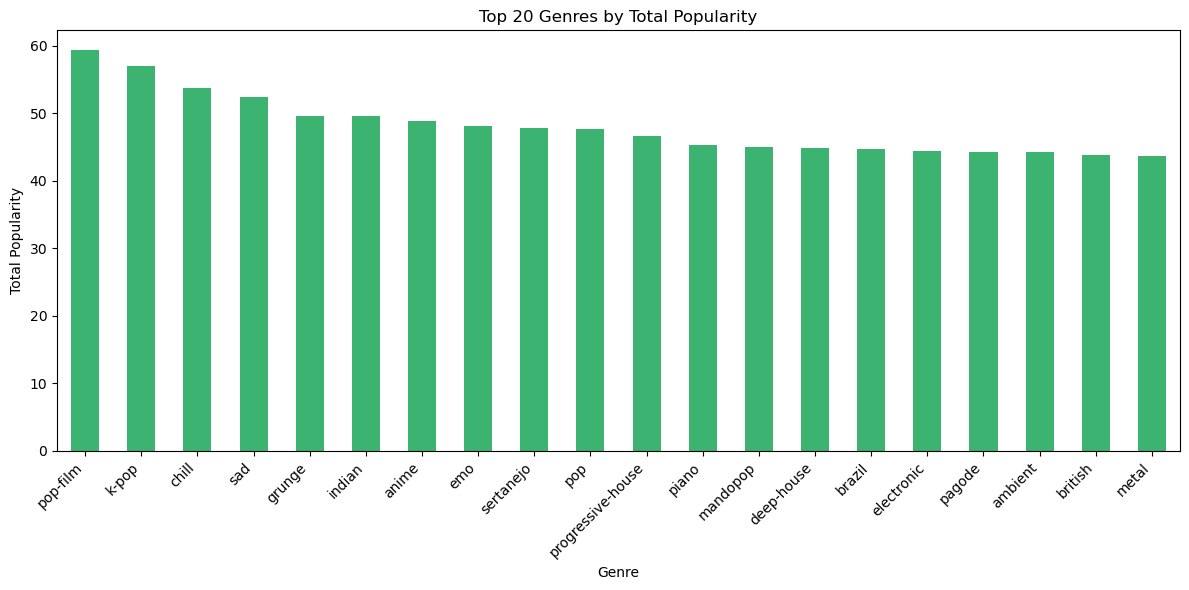

In [13]:
#plotting the top 20 
plt.figure(figsize=(12, 6))
popularity_by_genre.head(20).plot(kind='bar', color='mediumseagreen')
plt.title('Top 20 Genres by Total Popularity')
plt.xlabel('Genre')
plt.ylabel('Total Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


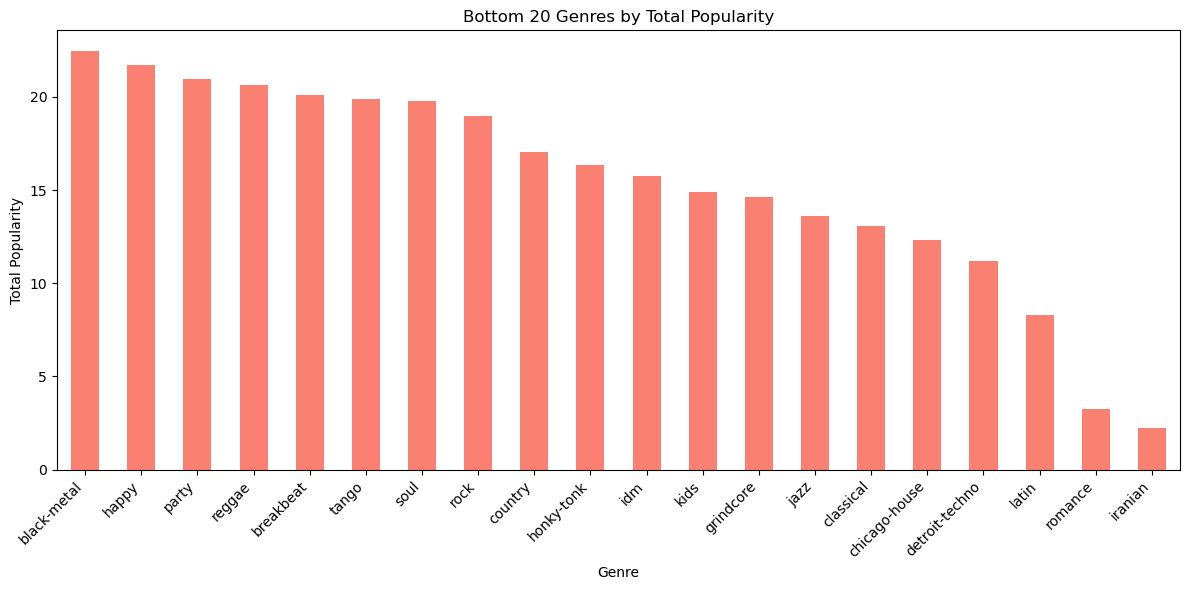

In [14]:
#plotting the bottom 20 
plt.figure(figsize=(12, 6))
popularity_by_genre.tail(20).plot(kind='bar', color='salmon')
plt.title('Bottom 20 Genres by Total Popularity')
plt.xlabel('Genre')
plt.ylabel('Total Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


  #### It is shown that pop film type of music are the most popular in the year closely followed by kpop and chill while the least listened to song is the iranian, then romance and latin

### 2 Does song containing explicit content play a fact in its popularity?

In [15]:
# how many song contains explicit contents and how many do not?
explicit_counts = df['explicit'].value_counts()
explicit_counts

explicit
False    104253
True       9747
Name: count, dtype: int64

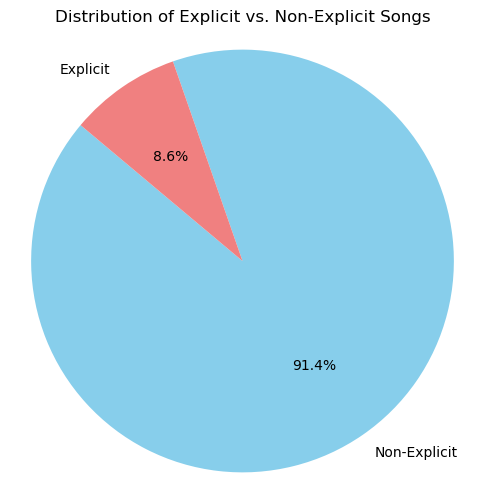

In [16]:
labels = ['Non-Explicit', 'Explicit']
colors = ['skyblue', 'lightcoral']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(explicit_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Explicit vs. Non-Explicit Songs')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()

In [17]:
# Calculate mean popularity grouped by explicit column (assumes 0/1 or False/True)
mean_popularity = df.groupby('explicit')['popularity'].mean()
mean_popularity

explicit
False    32.937891
True     36.454191
Name: popularity, dtype: float64

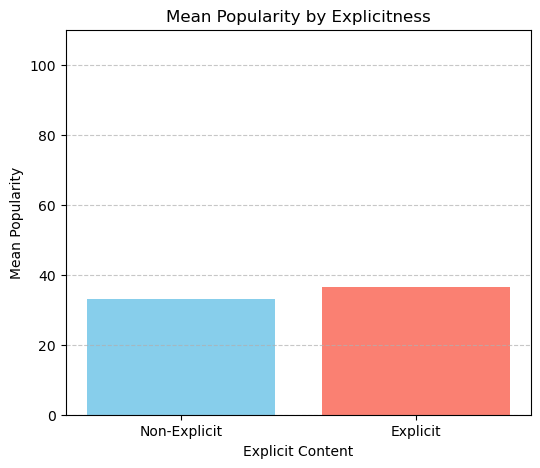

In [77]:
# Define labels
labels = ['Non-Explicit', 'Explicit']

plt.figure(figsize=(6,5))
plt.bar(labels, mean_popularity, color=['skyblue', 'salmon'])
plt.title('Mean Popularity by Explicitness')
plt.ylabel('Mean Popularity')
plt.xlabel('Explicit Content')
plt.ylim(0, df['popularity'].max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### To Test for its statistical signficance

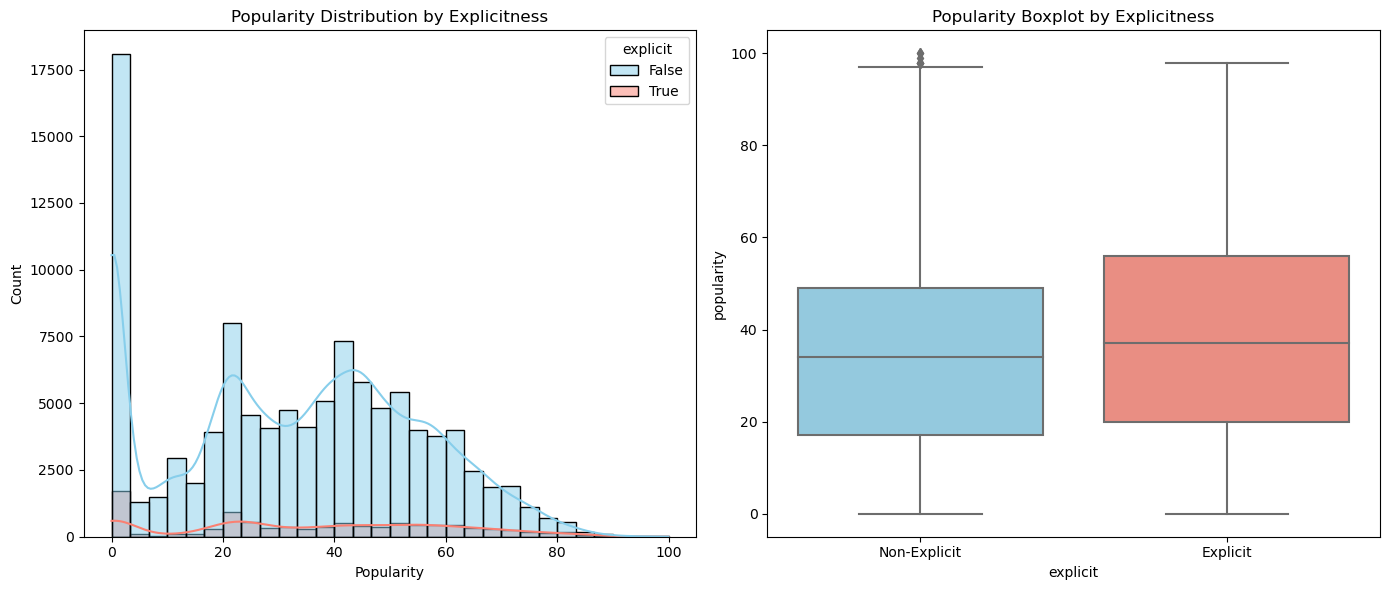

In [78]:

plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='popularity', hue='explicit', kde=True, bins=30, palette=['skyblue', 'salmon'])
plt.title('Popularity Distribution by Explicitness')
plt.xlabel('Popularity')
plt.ylabel('Count')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='explicit', y='popularity', data=df, palette=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.title('Popularity Boxplot by Explicitness')

plt.tight_layout()
plt.show()


In [12]:
# If the threshold for popularity is 70
pop_threshold = 70
df['is_popular'] = df['popularity'] >= pop_threshold

prop_popular = df.groupby('explicit')['is_popular'].mean() * 100  # in %
print(prop_popular)


explicit
False    4.401792
True     9.059198
Name: is_popular, dtype: float64


In [13]:
from scipy.stats import ttest_ind

pop_explicit = df[df['explicit'] == True]['popularity']
pop_non_explicit = df[df['explicit'] == False]['popularity']

t_stat, p_value = ttest_ind(pop_explicit, pop_non_explicit, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")


T-statistic: 13.755
P-value: 0.00000


#### This shows that there is a statistically significant difference in mean popularity between explicit and non-explicit songs. The difference is highly unlikely to be due to random chance and as a result we can conclude that songs having more explicit contents were more popular.

## Feature Engineering 

In [13]:

# Assuming df is your DataFrame and it has the following columns: 
# 'valence', 'energy', 'danceability', 'loudness'
# For example:
# df = pd.read_csv("spotify_data.csv")

# 1. Create a Mood Score feature (e.g., simple average of valence and energy)
df['mood_score'] = (df['valence'] + df['energy']) / 2

# 2. Create a Dance Potential feature (e.g., product of danceability and energy)
df['dance_potential'] = df['danceability'] * df['energy']

# 3. Normalize Loudness: assuming loudness is in dB (e.g., ranging from -60 to 0)
#    This scales loudness to a value between 0 and 1.
min_loud = df['loudness'].min()
max_loud = df['loudness'].max()
df['loudness_norm'] = (df['loudness'] - min_loud) / (max_loud - min_loud)

# Classify Tempo into classes
def categorize_tempo(t):
    if t < 90:
        return 'Slow'
    elif t <= 120:
        return 'Medium'
    else:
        return 'Fast'

df['tempo_category'] = df['tempo'].apply(categorize_tempo)


# Check the counts
print(df['tempo_category'].value_counts())

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['tempo_category_encoded'] = le.fit_transform(df['tempo_category'])

# Create a binary column: 1 for popular, 0 for not popular
df['is_popular'] = (df['popularity'] > 70).astype(int)

# Check the distribution
print(df['is_popular'].value_counts())




tempo_category
Fast      60663
Medium    36949
Slow      16388
Name: count, dtype: int64
is_popular
0    109154
1      4846
Name: count, dtype: int64


In [14]:
df

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,loudness,speechiness,...,tempo,time_signature,track_genre,popularity,mood_score,dance_potential,loudness_norm,tempo_category,tempo_category_encoded,is_popular
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,False,0.676,0.4610,-6.746,0.1430,...,87.917,4,acoustic,73,0.58800,0.311636,0.791392,Slow,2,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,False,0.420,0.1660,-17.235,0.0763,...,77.489,4,acoustic,55,0.21650,0.069720,0.597377,Slow,2,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,False,0.438,0.3590,-9.734,0.0557,...,76.332,4,acoustic,57,0.23950,0.157242,0.736123,Slow,2,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,False,0.266,0.0596,-18.515,0.0363,...,181.740,3,acoustic,71,0.10130,0.015854,0.573701,Fast,0,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,False,0.618,0.4430,-9.681,0.0526,...,119.949,4,acoustic,82,0.30500,0.273774,0.737103,Medium,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999,False,0.172,0.2350,-16.393,0.0422,...,125.995,5,world-music,21,0.13445,0.040420,0.612952,Fast,0,0
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000,False,0.174,0.1170,-18.318,0.0401,...,85.239,4,world-music,22,0.07600,0.020358,0.577345,Slow,2,0
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,271466,False,0.629,0.3290,-10.895,0.0420,...,132.378,4,world-music,22,0.53600,0.206941,0.714648,Fast,0,0
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,283893,False,0.587,0.5060,-10.889,0.0297,...,135.960,4,world-music,41,0.45950,0.297022,0.714759,Fast,0,0


### Reducing Our dataset to the features we need

In [15]:
#Reducing the dataset to the important features
col = ['duration_ms', 'explicit', 'dance_potential', 'mood_score','loudness_norm', 'speechiness', 'acousticness', 'liveness', 'tempo_category_encoded', 'time_signature',  'is_popular']
new_df = df[col]
new_df

,duration_ms,explicit,dance_potential,mood_score,loudness_norm,speechiness,acousticness,liveness,tempo_category_encoded,time_signature,is_popular
0,230666,False,0.311636,0.58800,0.791392,0.1430,0.0322,0.3580,2,4,1
1,149610,False,0.069720,0.21650,0.597377,0.0763,0.9240,0.1010,2,4,0
2,210826,False,0.157242,0.23950,0.736123,0.0557,0.2100,0.1170,2,4,0
3,201933,False,0.015854,0.10130,0.573701,0.0363,0.9050,0.1320,0,3,1
4,198853,False,0.273774,0.30500,0.737103,0.0526,0.4690,0.0829,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,False,0.040420,0.13445,0.612952,0.0422,0.6400,0.0863,0,5,0
113996,385000,False,0.020358,0.07600,0.577345,0.0401,0.9940,0.1050,2,4,0
113997,271466,False,0.206941,0.53600,0.714648,0.0420,0.8670,0.0839,0,4,0
113998,283893,False,0.297022,0.45950,0.714759,0.0297,0.3810,0.2700,0,4,0


In [17]:
# Calculate correlation matrix
correlation_matrix = new_df.corr(numeric_only=True)

# Show correlation of all features with 'popularity'
print(correlation_matrix['is_popular'].sort_values(ascending=False))


is_popular                1.000000
loudness_norm             0.071141
explicit                  0.063701
dance_potential           0.058393
mood_score                0.033387
time_signature            0.020306
tempo_category_encoded    0.004265
speechiness              -0.017342
duration_ms              -0.018837
liveness                 -0.047186
acousticness             -0.062292
Name: is_popular, dtype: float64


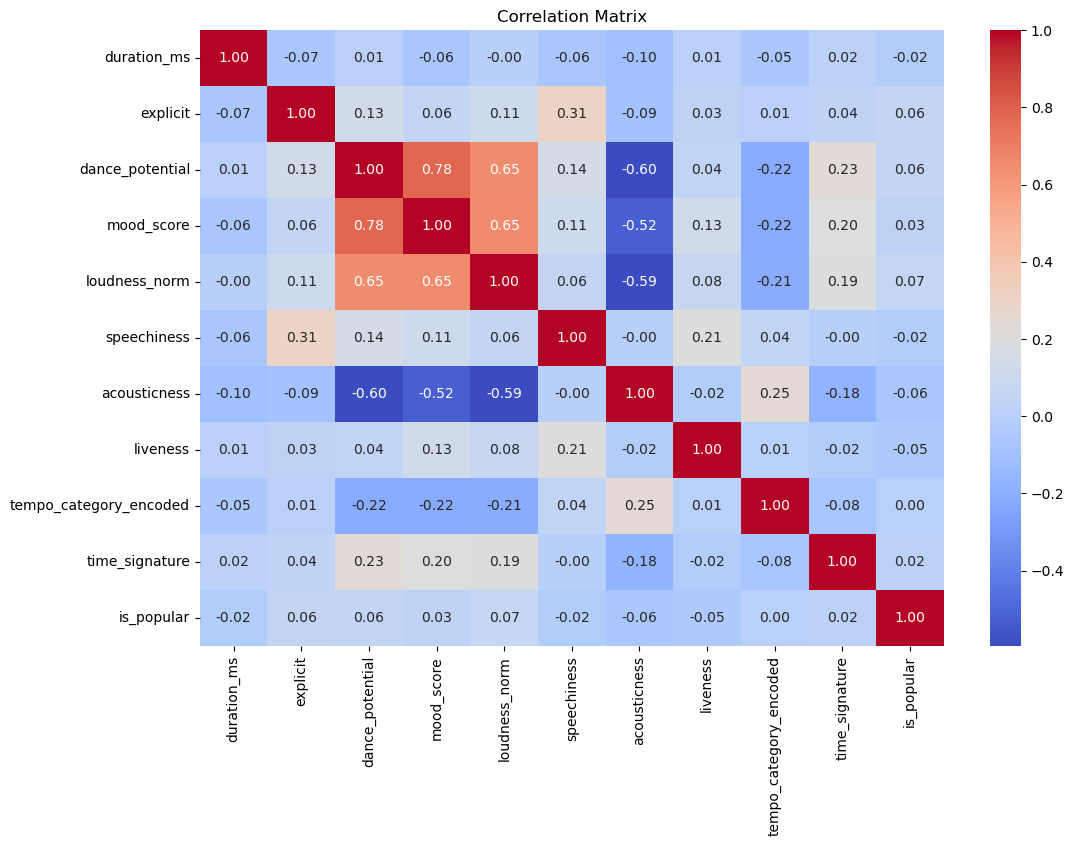

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Modelling

#### Using the Random Forest Classifier Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = new_df.drop(columns=[ 'is_popular'])  # Drop original target columns
y = new_df['is_popular']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9807894736842105

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21871
           1       0.92      0.58      0.71       929

    accuracy                           0.98     22800
   macro avg       0.95      0.79      0.85     22800
weighted avg       0.98      0.98      0.98     22800



#### Using the XGB Classifier 

In [25]:


xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9616228070175439

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     21871
           1       0.91      0.06      0.12       929

    accuracy                           0.96     22800
   macro avg       0.94      0.53      0.55     22800
weighted avg       0.96      0.96      0.95     22800



 ## 🧾 Conclusion

In this project, we developed and evaluated multiple machine learning models to predict the popularity of songs based on audio features from a Spotify dataset. We formulated a binary classification problem by defining songs with a popularity score above 70 as "popular" and those below as "not popular".

After preprocessing the data and engineering relevant features such as `mood_score`, `dance_potential`, and categorized `tempo`, we trained and compared two powerful ensemble models: **Random Forest Classifier** and **XGBoost Classifier**.

**Model Evaluation Summary:**

- **Random Forest Accuracy**: 98.1%
- **XGBoost Accuracy**: 96.2%

Based on these results, **Random Forest outperformed XGB Classifier**, achieving the highest accuracy and better overall classification metrics. This suggests that Random Forest was better able to capture the underlying patterns and interactions in the feature set, making it the most effective model for predicting song popularity in this case.

---

## 📌 Next Steps / Recommendations

- Explore **class balancing techniques** if class imbalance persists.
- Integrate **SHAP or feature importance analysis** to interpret model decisions.
- Expand to **multi-class or regression** models to predict exact popularity levels.
- Test the model’s generalizability using new or external datasets.

Overall, this project demonstrates how audio-based features can effectively inform predictive modeling in the music domain and provides a foundation for deeper recommendation systems or artist analytics.

